# New section

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataframe = pd.read_csv('nypd.csv')
# read top 10 rows
dataframe.head(10)

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
0,201904612204817,2019,2,02/08/2019,46,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,02/08/2019,B31678218
1,201904812229517,2019,3,03/09/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,03/09/2019,B31682790
2,201904812226617,2019,3,03/08/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,03/09/2019,B31682806
3,201904812231317,2019,3,03/10/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,03/09/2019,B31682806
4,201904212405517,2019,5,05/11/2019,42,PATROL BORO BRONX,BRONX,FELONY,ROBBERY,"ROBBERY,POCKETBOOK/CARRIED BAG",ANTI-MUSLIM,Religion/Religious Practice,05/10/2019,B31692174
5,201904212405517,2019,5,05/11/2019,42,PATROL BORO BRONX,BRONX,FELONY,ROBBERY,"ROBBERY,POCKETBOOK/CARRIED BAG",ANTI-MUSLIM,Religion/Religious Practice,05/10/2019,B31692175
6,201904212405517,2019,5,05/11/2019,42,PATROL BORO BRONX,BRONX,FELONY,ROBBERY,"ROBBERY,POCKETBOOK/CARRIED BAG",ANTI-MUSLIM,Religion/Religious Practice,05/10/2019,B31692176
7,201904012711317,2019,6,06/01/2019,40,PATROL BORO BRONX,BRONX,FELONY,RAPE,RAPE 1,ANTI-WHITE,Race/Color,06/14/2019,B31697030
8,201904912495217,2019,7,07/09/2019,49,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-HISPANIC,Ethnicity/National Origin/Ancestry,07/21/2019,B31702150
9,201904712851617,2019,8,08/05/2019,47,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,"MENACING,UNCLASSIFIED",ANTI-TRANSGENDER,Gender,08/05/2019,B31704341


**Check null values in the dataframe columns**

In [ ]:
dataframe.isnull().sum()


Full Complaint ID                  0
Complaint Year Number              0
Month Number                       0
Record Create Date                 0
Complaint Precinct Code            0
Patrol Borough Name                0
County                             0
Law Code Category Description      0
Offense Description                0
PD Code Description                0
Bias Motive Description            0
Offense Category                   0
Arrest Date                      784
Arrest Id                        784
dtype: int64

**check the shape and size  of dataframe**

In [ ]:
print(f'the number of rows : {dataframe.shape[0]}')
print(f'the number of columns :{dataframe.shape[1]}')

the number of rows : 1181
the number of columns :14


In [ ]:
percentageOfNull = dataframe.isnull().sum()/len(dataframe) * 100

percentageOfNull

Full Complaint ID                 0.00000
Complaint Year Number             0.00000
Month Number                      0.00000
Record Create Date                0.00000
Complaint Precinct Code           0.00000
Patrol Borough Name               0.00000
County                            0.00000
Law Code Category Description     0.00000
Offense Description               0.00000
PD Code Description               0.00000
Bias Motive Description           0.00000
Offense Category                  0.00000
Arrest Date                      66.38442
Arrest Id                        66.38442
dtype: float64

In [ ]:
dataframe.columns

Index(['Full Complaint ID', 'Complaint Year Number', 'Month Number',
       'Record Create Date', 'Complaint Precinct Code', 'Patrol Borough Name',
       'County', 'Law Code Category Description', 'Offense Description',
       'PD Code Description', 'Bias Motive Description', 'Offense Category',
       'Arrest Date', 'Arrest Id'],
      dtype='object')

**Remove null values columns with null value percentage more than 50%**

In [ ]:
dataframe = dataframe.drop(labels=['Arrest Id','Arrest Date'], axis=1)
dataframe.isnull().sum()

Full Complaint ID                0
Complaint Year Number            0
Month Number                     0
Record Create Date               0
Complaint Precinct Code          0
Patrol Borough Name              0
County                           0
Law Code Category Description    0
Offense Description              0
PD Code Description              0
Bias Motive Description          0
Offense Category                 0
dtype: int64

**Categorical columns and numerical columns**

In [ ]:
df = dataframe
df.columns

Index(['Full Complaint ID', 'Complaint Year Number', 'Month Number',
       'Record Create Date', 'Complaint Precinct Code', 'Patrol Borough Name',
       'County', 'Law Code Category Description', 'Offense Description',
       'PD Code Description', 'Bias Motive Description', 'Offense Category'],
      dtype='object')

In [ ]:
cols = df.columns

In [ ]:
numerical_Col = df._get_numeric_data().columns
print(numerical_Col)

Index(['Full Complaint ID', 'Complaint Year Number', 'Month Number',
       'Complaint Precinct Code'],
      dtype='object')


In [ ]:
categorical_Col = list(set(cols) - set(numerical_Col))
categorical_Col


['Bias Motive Description',
 'PD Code Description',
 'County',
 'Record Create Date',
 'Patrol Borough Name',
 'Offense Category',
 'Law Code Category Description',
 'Offense Description']

**Show top offensive category**

In [ ]:
offensive_cat = df['Offense Category'].value_counts()
offensive_cat

Religion/Religious Practice           596
Race/Color                            321
Sexual Orientation                    166
Gender                                 50
Ethnicity/National Origin/Ancestry     40
Unclassified                            6
Disability                              1
Age                                     1
Name: Offense Category, dtype: int64

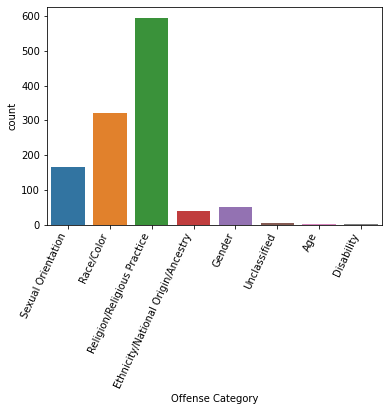

In [ ]:
import seaborn as sns

sns.countplot(x='Offense Category', data=df);
plt.xticks(rotation=65, horizontalalignment='right');

**Which county has more crime**

In [ ]:
df['County'].value_counts()

NEW YORK    421
KINGS       403
QUEENS      215
BRONX        95
RICHMOND     47
Name: County, dtype: int64

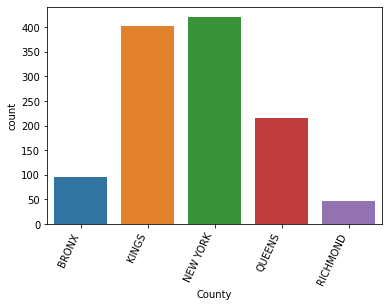

In [ ]:
sns.countplot(x='County', data=df);
plt.xticks(rotation=65, horizontalalignment='right');

In [ ]:
gkk = df.groupby(['Month Number'])['Offense Category'].count()
gkk

Month Number
1      86
2      83
3     142
4     114
5     147
6     120
7      97
8     101
9      97
10     71
11     54
12     69
Name: Offense Category, dtype: int64

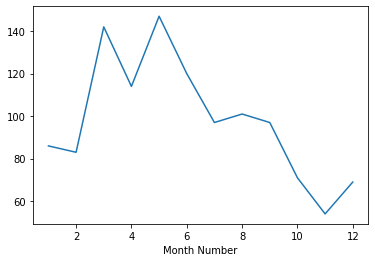

In [ ]:
gkk.plot();

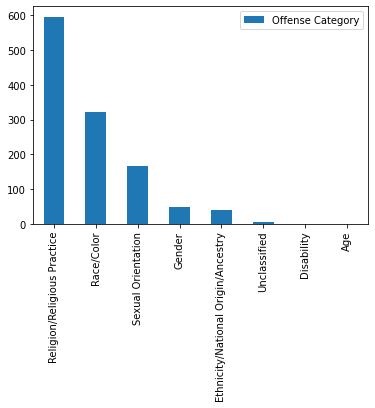

In [ ]:
df[['Offense Category']].apply(pd.Series.value_counts).plot.bar()

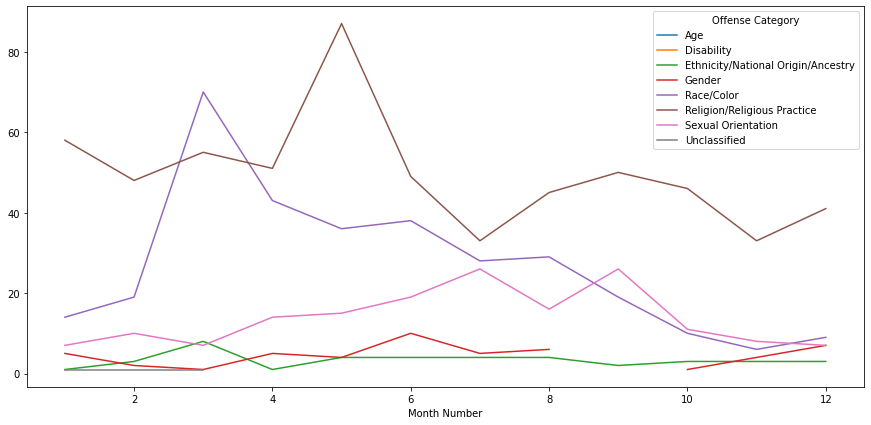

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Month Number','Offense Category']).count()['Record Create Date'].unstack().plot(ax=ax);